# Line Charts

## Representation of Data



So far, we've mostly been manipulating and working with data that are represented as tables. Microsoft Excel, the pandas library in Python, and the CSV file format for datasets were all developed around this representation. Because a table neatly organizes values into rows and columns, we can easily look up specific values at the intersection of a row value and a column value. Unfortunately, it's very difficult to explore a dataset to uncover patterns when it's represented as a table, especially when that dataset contains many values. We need a different representation of data that can help us identify patterns more easily.

In this mission, we'll learn the basics of **data visualization**, a discipline that focuses on the visual representation of data. As humans, our brains have evolved to develop powerful visual processing capabilities. We can quickly find patterns in the visual information we encounter, which was incredibly important from a survivability standpoint. Unfortunately, when data is represented as tables of values, we can't really take advantage of our visual pattern matching capabilities. This is because our ability to quickly process symbolic values (like numbers and words) is very poor. Data visualization focuses on transforming data from table representations visual ones.

In this lesson, named **Exploratory Data Analysis**, we'll focus on data visualization techniques to explore datasets and help us uncover patterns. In this mission, we'll use a specific type of data visualization to understand U.S. unemployment data.

## Introduction to the Data



The **United States Bureau of Labor Statistics (BLS)** surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. While unemployment rate isn't perfect, it's a commonly used proxy for the health of the economy. You may have heard politicians and reporters state the unemployment rate when commenting on the economy. You can read more about how the BLS calculates the unemployment rate [here](http://www.bls.gov/cps/cps_htgm.htm).

The BLS releases monthly unemployment data available for download as an Excel file, with the **.xlsx** file extension. While the pandas library can read in XLSX files, it relies on an external library for actually parsing the format. Let's instead download the same dataset as a CSV file from the website of the [Federal Reserve Bank of St. Louis](https://www.stlouisfed.org/). We've downloaded the monthly unemployment rate as a CSV from January 1948 to August 2016, saved it as **unrate.csv**, and made it available in this mission.

To download this dataset on your own, head to the Federal Reserve Bank of St. Louis's [website](https://fred.stlouisfed.org/series/UNRATE/downloaddata), select **Text, Comma Separated** as the **File Format**, make sure the **Date Range** field starts at **1948-01-01** and ends at **2016-08-01**.

Before we get into visual representations of data, let's first read this CSV file into pandas to explore the table representation of this data. The dataset we'll be working with is a [time series](https://en.wikipedia.org/wiki/Time_series) dataset, which means the data points (monthly unemployment rates) are ordered by time. Here's a preview of the dataset:

| DATA       | VALUE |
|------------|-------|
| 1948-01-01 | 3.4   |
| 1948-02-01 | 3.8   |
| 1948-03-01 | 4.0   |
| 1948-04-01 | 3.9   |
| 1948-05-01 | 3.5   |


When we read the dataset into a DataFrame, pandas will set the data type of the **DATE** column as a text column. Because of how pandas reads in strings internally, this column is given a data type of **object**. We need to convert this column to the **datetime** type using the [pandas.to_datetime()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) function, which returns a Series object with the **datetime** data type that we can assign back to the DataFrame:

```python
import pandas as pd
df['col'] = pd.to_datetime(df['col'])
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

**Description**:

1. Read **unrate.csv** into a DataFrame and assign to **unrate**.
2. Use the [pandas.to_datetime()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) function to convert the **DATE** column into a series of **datetime** values.
3. Display the first 12 rows in unrate.

In [ ]:
# put your code here

## Table representation



The dataset contains 2 columns:

- DATE: date, always the first of the month. Here are some examples:
    - 1948-01-01: January 1, 1948.
    - 1948-02-01: February 1, 1948.
    - 1948-03-01: March 1, 1948.
    - 1948-12-01: December 1, 1948.
- VALUE: the corresponding unemployment rate, in percent.

The first 12 rows reflect the unemployment rate from January 1948 to December 1948:

| DATA       | VALUE |
|------------|-------|
| 1948-01-01 | 3.4   |
| 1948-02-01 | 3.8   |
| 1948-03-01 | 4.0   |
| 1948-04-01 | 3.9   |
| 1948-05-01 | 3.5   |
| 1948-06-01 | 3.6   |
| 1948-07-01 | 3.6   |
| 1948-08-01 | 3.9   |
| 1948-09-01 | 3.8   |
| 1948-10-01 | 3.7   |
| 1948-11-01 | 3.8   |
| 1948-12-01 | 4.0   |

Take a minute to visually scan the table and observe how the monthly unemployment rate has changed over time. When you're finished, head to the next cell in this notebook.

## Observation from the table representation



We can make the following observations from the table:

- In 1948:
    - monthly unemployment rate ranged between **3.4** and **4.0**.
    - highest unemployment rate was reached in both March and December.
    - lowest unemployment rate was reached in January.
- From January to March, unemployment rate trended up.
- From March to May, unemployment rate trended down.
- From May to August, unemployment rate trended up.
- From August to October, unemployment rate trended down.
- From October to December, unemployment rate trended up.

Because the table only contained the data from 1948, it didn't take too much time to identify these observations. If we scale up the table to include all 824 rows, it would be very time-consuming and painful to understand. Tables shine at presenting information precisely at the intersection of rows and columns and allow us to perform quick lookups when we know the row and column we're interested in. In addition, problems that involve comparing values between adjacent rows or columns are well suited for tables. Unfortunately, many problems you'll encounter in data science require comparisons that aren't possible with just tables.

For example, one thing we learned from looking at the monthly unemployment rates for 1948 is that every few months, the unemployment rate switches between trending up and trending down. It's not switching direction every month, however, and this could mean that there's a seasonal effect. **Seasonality** is when a pattern is observed on a regular, predictable basis for a specific reason. A simple example of seasonality would be a large increase textbook purchases every August every year. Many schools start their terms in August in north hemisphere and this spike in textbook sales is directly linked.

We need to first understand if there's any seasonality by comparing the unemployment trends across many years so we can decide if we should investigate it further. The faster we're able to assess our data, the faster we can perform high-level analysis quickly. If we're reliant on just the table to help us figure this out, then we won't be able to perform a high level test quickly. Let's see how a visual representation of the same information can be more helpful than the table representation.

## Visual representation



Instead of representing data using text like tables do, visual representations use visual objects like dots, shapes, and lines on a grid. [Plots](https://en.wikipedia.org/wiki/Plot_%28graphics%29) are a category of visual representations that allow us to easily understand the relationships between variables. There are many types of plots and selecting the right one is an important skill that you'll hone as you create data visualizations. Because we want to compare the unemployment trends across time, we should use line charts. Here's an overview of **line charts** using 4 sample data points:


<img width="900" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0Ulhpb2pwTGRUYzQ">

Line charts work best when there is a logical connection between adjacent points. In our case, that connection is the flow of time. Between 2 reported monthly unemployment values, the unemployment rate is fluctuating and time is passing. To emphasize how the visual representation of the line chart helps us observe trends easily, let's look at the same 12 data points from 1948 as a line chart.

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0cHVJUUVTdlh1ZHc">

We can reach the same observations about the data from the line chart as we did from the table representation:

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0Szk1OERkRlNnSnc">

In the rest of this mission, we'll explore how to recreate this line chart in Python. In the next mission, we'll explore how to create multiple line charts to help us compare unemployment trends.

## Introduction to matplotlib



To create the line chart, we'll use the [matplotlib](http://matplotlib.org/) library, which allows us to:

- quickly create common plots using high-level functions
- extensively tweak plots
- create new kinds of plots from the ground up

To help you become familiar with matplotlib, we'll focus on the first 2 use cases. When working with commonly used plots in matplotlib, the general workflow is:

- create a plot using data
- customize the appearance of the plot
- display the plot
- edit and repeat until satisfied

This interactive style aligns well with the exploratory workflow of data visualization because we're asking questions and creating data visualizations to help us get answers. The pyplot module provides a high-level interface for matplotlib that allows us to quickly create common data plots and perform common tweaks to them.

The pyplot module is commonly imported as **plt** from **matplotlib**:

```python
import matplotlib.pyplot as plt
```

Using the different pyplot functions, we can create, customize, and display a plot. For example, we can use 2 functions to :

```python
plt.plot()
plt.show()
```

Because we didn't pass in any arguments, the [plot()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function would generate an empty plot with just the axes and ticks and the [show()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show) function would display that plot. You'll notice that we didn't assign the plot to a variable and then call a method on the variable to display it. We instead called 2 functions on the pyplot module directly.

This is because every time we call a pyplot function, the module maintains and updates the plot internally (also known as state). When we call **show()**, the plot is displayed and the internal state is destroyed. While this workflow isn't ideal when we're writing functions that create plots on a repeated basis as part of a larger application, it's useful when exploring data.

Let's run this code to see the default properties matplotlib uses. If you'd like to follow along on your own computer, we recommend installing matplotlib using Anaconda: **conda install matplotlib**. We recommend working with matplotlib using Jupyter Notebook because it can render the plots in the notebook itself. You will need to run the following Jupyter magic in a code cell each time you open your notebook: **%matplotlib inline**. Whenever you call **show()**, the plots will be displayed in the output cell. You can read more [here](http://ipython.readthedocs.io/en/stable/interactive/plotting.html).




**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"><left>


**Description**:

1. Generate an empty plot using **plt.plot()** and display it using **plt.show()**.


In [ ]:
# put your code here

## Adding data




By default, Matplotlib displayed a coordinate grid with:

- the x-axis and y-axis values ranging from **-0.06** to **0.06**
- no grid lines
- no data

Even though no data was plotted, the x-axis and y-axis ticks corresponding to the **-0.06** to **0.06** value range. The axis ticks consist of tick marks and tick labels. Here's a focused view of the x-axis tick marks and x-axis tick labels:


<img width="700" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0MmNhaUpLYV9jVHM">


To create a line chart of the unemployment data from 1948, we need:

- the x-axis to range from **01-01-1948** to **12-01-1948** (which corresponds to the first and last months in 1948)
- the y-axis to range from **3.4** to **4.0** (which correspond to the minimum and maximum unemployment values)

Instead of manually updating the ticks, drawing each marker, and connecting the markers with lines, we can just specify the data we want plotted and let matplotlib handle the rest. To generate the line chart we're interested in, we pass in the list of x-values as the first parameter and the list of y-values as the second parameter to [plot()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot):

```python
plt.plot(x_values, y_values)
```

Matplotlib will accept any iterable object, like NumPy arrays and **pandas.Series** instances.



**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


**Description**:

1. Generate a line chart that visualizes the unemployment rates from 1948:
    - x-values should be the first 12 values in the **DATE** column
    - y-values should be the first 12 values in the **VALUE** column
2. Display the plot.

In [ ]:
# put your code here

## Fixing axis ticks




While the y-axis looks fine, the x-axis **tick labels** are too close together and can be unreadable. The line charts from earlier in the mission suggest a better way to display the x-axis tick labels.

We can rotate the x-axis tick labels by 90 degrees so they don't overlap. The **xticks()** function within pyplot lets you customize the behavior of the x-axis ticks. If you head over to the [documentation for that function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks), it's not immediately obvious the arguments it takes:

```python
matplotlib.pyplot.xticks(*args, **kwargs)
```

In the documentation for the function, you'll see a link to the matplotlib [Text](http://matplotlib.org/api/text_api.html#matplotlib.text.Text) class, which is what pyplot uses to represent the x-axis tick labels. You'll notice that there's a **rotation** parameter that accepts degrees of rotation as a parameter. We can specify degrees of rotation using a float or integer value.

As a side note, if you read the documentation for [pyplot](http://matplotlib.org/api/pyplot_api.html), you'll notice that many functions for tweaking the x-axis have matching functions for the y-axis. For example, the y-axis counterpart to the [xticks()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks) function is the yticks() function.

Use what we've discussed so far to rotate the x-axis tick labels by 90 degrees.




**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


**Description**:

1. Generate the same line chart from the last screen that visualizes the unemployment rates from 1948:
    - x-values should be the first 12 values in the **DATE** column
    - y-values should be the first 12 values in the **VALUE** column
2. Use **pyplot.xticks()** to rotate the x-axis tick labels by **90** degrees.
3. Display the plot.


In [15]:
# put your code here

## Adding axis label and a title



Let's now finish tweaking this plot by adding axis labels and a title. Always adding axis labels and a title to your plot is a good habit to have, and is especially useful when we're trying to keep track of multiple plots down the road.

Here's an overview of the pyplot functions we need to tweak the axis labels and the plot title:

- [xlabel()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlabel): accepts a string value, which gets set as the x-axis label.
- [ylabel()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylabel): accepts a string value, which is set as the y-axis label.
- [title()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title): accepts a string value, which is set as the plot title.



**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


**Description**:

1. Generate the same line chart from the last screen that visualizes the unemployment rates from 1948:
    - x-values should be the first 12 values in the **DATE** column
    - y-values should be the first 12 values in the **VALUE** column
    - Rotate the x-axis tick labels by **90** degrees.
2. Set the x-axis label to **"Month"**.
3. Set the y-axis label to **"Unemployment Rate"**.
4. Set the plot title to **"Monthly Unemployment Trends, 1948"**.
5. Display the plot.

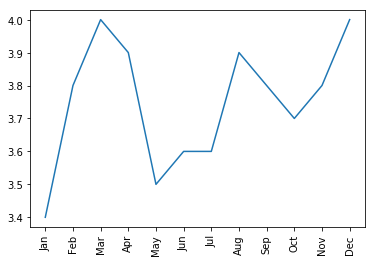

In [15]:
# put your code here

import pandas as pd
import matplotlib.pyplot as plt

unrate = pd.read_csv("unrate.csv")
unrate["DATE"] = pd.to_datetime(unrate.DATE)

unrate_1948 = unrate[unrate["DATE"].dt.year == 1948]

plt.plot(unrate_1948.DATE.dt.month, unrate_1948.VALUE)
plt.xticks(unrate_1948.DATE.dt.month,unrate_1948.DATE.dt.strftime("%b"), rotation=90)
plt.show()
# tip - customize xticks
# plt.plot(range(0,12),y)
# plt.xticks(range(0,12),x.dt.strftime('%b %Y'),rotation=90)

# Multiples Charts

## Matplotlib Classes



When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

- a container for all plots was created (returned as a [Figure object](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure))
- a container for the plot was positioned on a grid (the plot returned as an [Axes object](http://matplotlib.org/api/axes_api.html#matplotlib-axes))
- visual symbols were added to the plot (using the Axes methods)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling [pyplot.figure()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure):

```python
fig = plt.figure()
```

Instead of only calling the pyplot function, we assigned its return value to a variable (**fig**). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:

- values on the x-axis and y-axis
- ticks on the x-axis and y-axis
- all visual symbols, such as:
- markers
- lines
- gridlines

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use [Figure.add_subplot](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_subplot). This will return a new Axes object, which needs to be assigned to a variable:

```python
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```

If we want the figure to contain 2 plots, one above the other, we need to write:

```python
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```

This will create a grid, 2 rows by 1 column, of plots. Once we're done adding subplots to the figure, we display everything using **plt.show()**:

```python
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()
```

Let's create a figure, add subplots to it, and display it.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


**Description**:

1. Use **plt.figure()** to create a figure and assign to **fig**.
2. Use **Figure.add_subplot()** to create two subplots above and below each other
    - Assign the top Axes object to **ax1**.
    - Assign the bottom Axes object to **ax2**.
5. Use **plt.show()** to display the resulting plot.




In [ ]:
# put your code here

## Grid positioning



For each subplot, matplotlib generated a coordinate grid that was similar to the one we generated in the last mission using the **plot()** function:

- the x-axis and y-axis values ranging from **0.0** to **1.0**
- no gridlines
- no data

The main difference is that this plot ranged from **0.0** to **1.0** instead of from **-0.06** to **0.06**, which is a quirk suggested by a difference in default properties.

Now that we have a basic understanding of the important matplotlib classes, we can create multiple plots to compare monthly unemployment trends. If you recall, we need to specify the position of each subplot on a grid. Here's a diagram that demonstrates how a 2 by 2 subplot layout would look like:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0QVVYZUpMSkxlVEU">


When the first subplot is created, matplotlib knows to create a grid with 2 rows and 2 columns. As we add each subplot, we specify the plot number we want returned and the corresponding Axes object is created and returned. In matplotlib, the plot number starts at the top left position in the grid (left-most plot on the top row), moves through the remaining positions in that row, then jumps to the left-most plot in the second row, and so forth.

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0QmtiRWtOQ3JmVFE">

If we created a grid of 4 subplots but don't create a subplot for each position in the grid, areas without axes are left blank:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0YmNxX2l1dVNfcFU">

## Adding data



To generate a line chart within an Axes object, we need to call [Axes.plot()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot) and pass in the data you want plotted:

```python
x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]
ax1.plot(x_values, y_values)
```

Like **pyplot.plot()**, the **Axes.plot()** will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. It will also use generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call **Axes.plot()** and pass in the data we want to use in that plot.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



**Description**:

1. Create 2 line subplots in a 2 row by 1 column layout:
    - In the top subplot, plot the data from 1948.
        - For the x-axis, use the first 12 values in the **DATE** column.
        - For the y-axis, use the first 12 values in the **VALUE** column.
    - In the bottom subplot, plot the data from 1949.
        - For the x-axis, use the values from index 12 to 24 in the **DATE** column.
        - For the y-axis, use the values from index 12 to 24 in the **VALUE** column.
2. Use **plt.show()** to display all the plots.



In [ ]:
# put your code here

# tip
# use plt.tight_layout() to split a few spaces between figures

## Formating and spacing



One issue with the 2 plots is that the x-axis ticks labels are unreadable. The other issue is that the plots are squeezed together vertically and hard to interpret. Even though now we generated 2 line charts, the total plotting area for the figure remained the same:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0MzZEZ21VTGQyak0">


This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure. To tweak the dimensions of the plotting area, we need to use the **figsize** parameter when we call **plt.figure()**:

This parameter takes in a tuple of floats:

```python
fig = plt.figure(figsize=(width, height))
```

The unit for both width and height values is inches. The **dpi** parameter, or dots per inch, and the **figsize** parameter determine how much space on your display a plot takes up. By increasing the width and the height of the plotting area, we can address both issues.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



**Description**:

1. For the plot we generated in the last screen, set the width of the plotting area to **12** inches and the height to **6** inches.


In [ ]:
# put your code here

## Comparing across more years



Instead of having to rotate the x-axis tick labels, we were able to horizontally extend the entire plotting area to make the labels more readable. Because the goal is to be able to look for any visual similarities between the lines in the plots, we want the space between the 2 plots to be as small as possible. If we had rotated the labels by 90 degrees instead, like we did in the last mission, we'd need to increase the spacing between the plots to keep them from overlapping. Expanding the plotting area horizontally improved the readability of the x-axis tick labels and minimized the amount of space between the 2 line charts.

If you recall, we generated these 2 line charts because we were interested in looking for any seasonality in the monthly unemployment trends. If you spend some time visually analyzing both line charts, you'll discover that there's no changes in unemployment trends that are occurring in the same month in both years.

Let's visualize data from a few more years to see if we find any evidence for seasonality between those years.


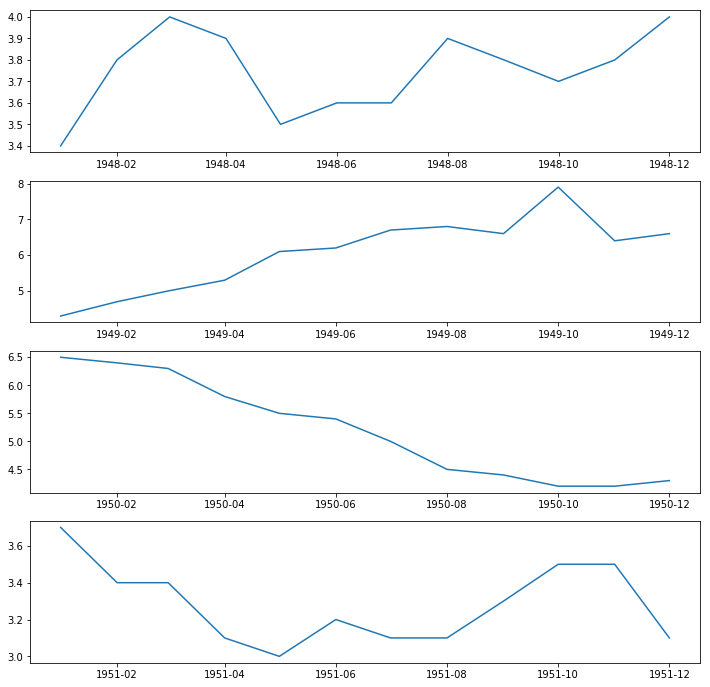

In [43]:
fig = plt.figure(figsize=(12,12))

for i,year in enumerate(range(1948,1952)):
    ax = fig.add_subplot(4,1,i+1)
    subset = unrate[unrate.DATE.dt.year == year]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

## Overlaying line charts



By adding more line charts, we can look across more years for seasonal trends. This comes at a cost, unfortunately. We now have to visually scan over more space, which is a limitation that we experienced when scanning the table representation of the same data. If you recall, one of the limitations of the table representation we discussed in the previous mission was the amount of time we'd have to spend scanning the table as the number of rows increased significantly.

We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. First, we'll explore how to extract just the month values from the **DATE** column, then we'll dive into generating multiple plots on the same coordinate grid.

To extract the month values from the **DATE** column and assign them to a new column, we can use the [pandas.Series.dt](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dt-accessors) accessor:

```python
unrate['MONTH'] = unrate['DATE'].dt.month
```

Calling **pandas.Series.dt.month** returns a Series containing the integer values for each month (e.g. 1 for January, 2 for February, etc.). Under the hood, pandas applies the datetime.date function over each datetime value in the **DATE** column, which returns the integer month value. Let's now move onto generating multiple line charts in the same subplot.

In the last mission, we called **pyplot.plot()** to generate a single line chart. Under the hood, matplotlib created a figure and a single subplot for this line chart. If we call **pyplot.plot()** multiple times, matplotlib will generate the line charts on the single subplot.

```python
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])
```

If we want to set the dimensions for the plotting area, we can create the figure ourselves first then plot the data. This is because matplotlib first checks if a figure already exists before plotting data. It will only create one if we didn't create a figure.

```python
fig = plt.figure(figsize=(6,6))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])
```

By default, matplotlib will select a different color for each line. To specify the color ourselves, use the __c__ parameter when calling **plot()**:

```python
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
```

You can read about the different ways we can specify colors in matplotlib [here](http://matplotlib.org/api/colors_api.html).


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



**Description**:

1. Set the plotting area to a width of 6 inches and a height of 3 inches.
2. Generate 2 line charts from **unrate**, using the **MONTH** column for the x-axis instead of the **DATE** column:
    - One line chart using data from 1948, with the line color set to "red".
    - One line chart using data from 1949, with the line color set to "blue".
3. Use **plt.show()** to display the plots.

In [ ]:
# put your code here

## Adding more lines

Let's visualize 5 years worth of unemployment rates on the same subplot.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



**Description**:

1. Set the plotting area to a width of **10** inches and a height of **6** inches.
2. Generate the following plots in the base subplot:
    - 1948: set the line color to "red"
    - 1949: set the line color to "blue"
    - 1950: set the line color to "green"
    - 1951: set the line color to "orange"
    - 1952: set the line color to "black"
3. Use **plt.show()** to display the plots.

In [ ]:
# put your code here

## Adding a legend


How colorful! By plotting all of the lines in one coordinate grid, we got a different perspective on the data. The main thing that sticks out is how the blue and green lines span a larger range of y values (4% to 8% for blue and 4% to 7% for green) while the 3 plots below them mostly range only between 3% and 4%. You can tell from the last sentence that we don't know which line corresponds to which year, because the x-axis now only reflects the month values.

To help remind us which year each line corresponds to, we can add a **legend** that links each color to the year the line is representing. Here's what a legend for the lines in the last screen could look like:

<img width="200" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0VlRkLWo4d000MGs">


When we generate each line chart, we need to specify the text label we want each color linked to. The **pyplot.plot()** function contains a **label** parameter, which we use to set the year value:

```python
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label='1948')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label='1949')
```

We can create the legend using [pyplot.legend](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend) and specify its location using the loc parameter:

```python
plt.legend(loc='upper left')
```

If we're instead working with multiple subplots, we can create a legend for each subplot by mirroring the steps for each subplot. When we use **plt.plot()** and **plt.legend()**, the **Axes.plot()** and **Axes.legend()** methods are called under the hood and parameters passed to the calls. When we need to create a legend for each subplot, we can use **Axes.legend()** instead.

Let's now add a legend for the plot we generated in the last screen.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



**Description**:

1. Modify the code from the last screen that overlaid 5 plots to include a legend. Use the year value for each line chart as the label.
    - E.g. the plot of 1948 data that uses "red" for the line color should be labeled "1948" in the legend.
2. Place the legend in the "upper left" corner of the plot.
3. Display the plot using **plt.show()**.

In [ ]:
# put your code here

## Final tweaks



Instead of referring back to the code each time we want to confirm what subset each line corresponds to, we can focus our gaze on the plotting area and use the legend. At the moment, the legend unfortunately covers part of the green line (which represents data from 1950). Since the legend isn't critical to the plot, we should move this outside of the coordinate grid. We'll explore how to do so in a later course because it requires a better understanding of some design principles as well as matplotlib.

Before we wrap up this mission, let's enhance the visualization by adding a title and labels for both axes. To set the title, we use [pyplot.title()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title) and pass in a string value:

```python
plt.title("Monthly Unemployment Trends, 1948-1952")
```

To set the x-axis and y-axis labels, we use **pyplot.xlabel()** and **pyplot.ylabel()**. Both of these methods accept string values.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



**Description**:

1. Modify the code from the last screen:
    - Set the title to **"Monthly Unemployment Trends, 1948-1952"**.
    - Set the x-axis label to **"Month, Integer"**.
    - Set the y-axis label to **"Unemployment Rate, Percent"**.

In [ ]:
# put your code here

# Bar and Scatter Plots

## Introduction to the Data


To investigate how different movie review sites the potential bias that movie reviews site has, **FiveThirtyEight** compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from **Metacritic**, **Fandango**, **Rotten Tomatoes**, and **IMDB** review and rate the film. They also ask the users in their respective communities to review and rate the film. Then, they calculate the average rating from both critics and users and display them on their site. Here are screenshots from each site:


<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0VE5BNVVnT1piWjA">


FiveThirtyEight compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings. After discovering that a few films that weren't good were still rated highly on Fandango, the team investigated and published an [article about bias in movie ratings](http://fivethirtyeight.com/features/fandango-movies-ratings/).


We'll be working with the **fandango_scores.csv** file, which can be downloaded from the [FiveThirtEight Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). Here are the columns we'll be working with in this mission:

- **FILM** - film name
- **RT_user_norm**  - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
- **Metacritic_user_nom**  - average user rating from Metacritc, normalized to a 1 to 5 point scale
- **IMDB_norm** - average user rating from IMDB, normalized to a 1 to 5 point scale
- **Fandango_Ratingvalue** - average user rating from Fandango, normalized to a 1 to 5 point scale
- **Fandango_Stars** - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)


Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest **0.5** value). The **Fandango_Ratingvalue** column reflects the true average rating while the **Fandango_Stars** column reflects the displayed, rounded rating.

Let's read in this dataset, which allows us to compare how a movie fared across all 4 review sites.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



**Description**:


1. Read **fandango_scores.csv** into a Dataframe named **reviews**.
2. Select the following columns and assign the resulting Dataframe to **norm_reviews**:
    - **FILM**
    - **RT_user_norm**
    - **Metacritic_user_nom** (note the misspelling of norm)
    - **IMDB_norm**
    - **Fandango_Ratingvalue**
    - **Fandango_Stars**
3. Display the first row in **norm_reviews**

In [ ]:
# put your code here

## Bar plot



These sites use different scales for ratings. Some use a 5 star scale while others use a 100 point scale. In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users. We'll focus on just the average scores from users, because not all of the sites have scores from critics.

The **RT_user_norm**, **Metacritic_user_nom**, **IMDB_norm**, and **Fandango_Ratingvalue** columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie. While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.

If you look at the first row, which lists the average user ratings for **Avengers: Age of Ultron (2015)**, you'll notice that the Fandango ratings, both the actual and the displayed rating, are higher than those from the other sites for a given movie. While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding. We need a visualization that scales graphical objects to the quantitative values we're interested in comparing. One of these visualizations is a **bar plot**.

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0T1ltc2tnb2lDbHc">


In the bar plot above, the x-axis represented the different ratings and the y-axis represented the actual ratings. An effective bar plot uses categorical values on one axis and numerical values on the other axis. Because bar plots can help us find the category corresponding to the smallest or largest values, it's important that we restrict the number of bars in a single plot. Using a bar plot to visualize hundreds of values makes it difficult to trace the category with the smallest or largest value.

If the x-axis contains the categorical values and the rectangular bars are scaled vertically, this is known as a vertical bar plot. A horizontal bar plot flips the axes, which is useful for quickly spotting the largest value.

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0cDhyZEttU0JTSnM">

An effective bar plot uses a consistent width for each bar. This helps keep the visual focus on the heights of the bars when comparing. Let's now learn how to create a vertical bar plot in matplotlib that represents the different user scores for Avengers: Age of Ultron (2015).

##  Creating bars



When we generated line charts, we passed in the data to **pyplot.plot()** and matplotlib took care of the rest. Because the markers and lines in a line chart correspond directly with x-axis and y-axis coordinates, all matplotlib needed was the data we wanted plotted. To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. Here's a diagram that shows the various values we need to specify:

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0NkExT245Q2Fva00">


We'll focus on positioning the bars on the x-axis in this step and on positioning the x-axis labels in the next step. We can generate a vertical bar plot using either [pyplot.bar()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) or [Axes.bar()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.bar). We'll use **Axes.bar()** so we can extensively customize the bar plot more easily. We can use [pyplot.subplots()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to first generate a single subplot and return both the Figure and Axes object. This is a shortcut from the technique we used in the previous section:

```python
fig, ax = plt.subplots()
```

The **Axes.bar()** method has 2 required parameters, left and height. We use the left parameter to specify the x coordinates of the left sides of the bar (marked in blue on the above image). We use the height parameter to specify the height of each bar. Both of these parameters accept a list-like object.

The [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function returns evenly spaced values. We use **arange()** to generate the positions of the **left** side of our bars. This function requires a paramater that specifies the number of values we want to generate. We'll also want to add space between our bars for better readability:

```python
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
import numpy as np
bar_positions = np.arange(5) + 0.75
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0]
ax.bar(bar_positions, bar_heights)
```


We can also use the width parameter to specify the width of each bar. This is an optional parameter and the width of each bar is set to **0.8** by default. The following code sets the width parameter to **1.5**:

```python
ax.bar(bar_positions, bar_heights, 1.5)
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>



1. Create a single **subplot** and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a bar plot with:
    - __x__ set to **bar_positions**
    - **height** set to **bar_heights**
    - **width** set to 0.5
3. Use **plt.show()** to display the bar plot.

In [2]:
# put your code here
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

## Aligning Axis Ticks And Labels




By default, matplotlib sets the x-axis tick labels to the integer values the bars spanned on the x-axis (from **0** to **6**). We only need tick labels on the x-axis where the bars are positioned. We can use [Axes.set_xticks()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticks) to change the positions of the ticks to **[1, 2, 3, 4, 5]**:

```python
tick_positions = range(1,6)
ax.set_xticks(tick_positions)
```

Then, we can use [Axes.set_xticklabels()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticklabels) to specify the tick labels:

```python
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.set_xticklabels(num_cols)
```

If you look at the [documentation](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticklabels) for the method, you'll notice that we can specify the orientation for the labels using the **rotation** parameter:

```python
ax.set_xticklabels(num_cols, rotation=90)
```

Rotating the labels by 90 degrees keeps them readable. In addition to modifying the x-axis tick positions and labels, let's also set the x-axis label, y-axis label, and the plot title.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Create a single subplot and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a bar plot with:
    - __x__ set to **bar_positions**
    - **height** set to **bar_heights**
    - **width** set to **0.5**
3. Set the x-axis tick positions to **tick_positions**.
4. Set the x-axis tick labels to **num_cols** and rotate by **90** degrees.
5. Set the x-axis label to **"Rating Source"**.
6. Set the y-axis label to **"Average Rating"**.
7. Set the plot title to **"Average User Rating For Avengers: Age of Ultron (2015)"**.
8. Use **plt.show()** to display the bar plot.

In [ ]:
# put your code here

## Horizontal bar plot



We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using **Axes.bar()**, we use [Axes.barh()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.barh). This method has 2 required parameters, **bottom** and **width**. We use the **bottom** parameter to specify the y coordinate for the bottom sides for the bars and the **width** parameter to specify the lengths of the bars:

```python
bar_widths = norm_reviews[num_cols].iloc[0]
bar_positions = arange(5) + 0.75
ax.barh(bar_positions, bar_widths, 0.5)
```

To recreate the bar plot from the last step as horizontal bar plot, we essentially need to map the properties we set for the y-axis instead of the x-axis. We use **Axes.set_yticks()** to set the y-axis tick positions to **[1, 2, 3, 4, 5]** and **Axes.set_yticklabels()** to set the tick labels to the column names:

```python
tick_positions = range(5) + 1
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
```

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Create a single **subplot** and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a **bar horizontal** plot with:
    - __y__ set to **bar_positions**
    - **width** set to **bar_widths**
    - **height** set to 0.5
3. Set the y-axis tick positions to **tick_positions**.
4. Set the y-axis tick labels to **num_cols**.
5. Set the y-axis label to **"Rating Source"**.
6. Set the x-axis label to **"Average Rating"**.
7. Set the plot title to **"Average User Rating For Avengers: Age of Ultron (2015)".**
8. Use **lt.show()** to display the bar horizontal plot.

In [ ]:
# put your code here

## Scatter plot



From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites. While bar plots help us visualize a few data points to quickly compare them, they aren't good at helping us visualize many data points. Let's look at a plot that can help us visualize many points.

In the previous mission, the line charts we generated always connected points from left to right. This helped us show the trend, up or down, between each point as we scanned visually from left to right. Instead, we can avoid using lines to connect markers and just use the underlying markers. A plot containing just the markers is known as a **scatter plot**.


<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0bDdWNU5HVDdpUHc">


A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the [correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient) will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

To generate a scatter plot, we use [Axes.scatter()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.scatter). The **scatter()** method has 2 required parameters, x and y, which matches the parameters of the **plot()** method. The values for these parameters need to be iterable objects of matching lengths (lists, NumPy arrays, or pandas series).

Let's start by creating a scatter plot that visualizes the relationship between the **Fandango_RatingValue** and **RT_user_norm** columns. We're looking for at least a weak correlation between the columns.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. Create a single subplot and assign the returned Figure object to **fig** and the returned Axes object to **ax**.
2. Generate a scatter plot with the **Fandango_Ratingvalue** column on the x-axis and the  **RT_user_norm** column on the y-axis.
3. Set the x-axis label to **"Fandango"** and the y-axis label to **"Rotten Tomatoes"**.
4. Use **plt.show()** to display the resulting plot.

In [ ]:
# put your code here

## Switching axes



The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

When using scatter plots to understand how 2 variables are correlated, it's usually not important which one is on the x-axis and which one is on the y-axis. This is because the relationship is still captured either way, even if the plots look a little different. If you want to instead understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis. Doing so helps emphasize the potential cause and effect relation.

In our case, we're not exploring if the ratings from Fandango influence those on Rotten Tomatoes and we're instead looking to understand how much they agree. Let's see what happens when we flip the columns.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- For the subplot associated with **ax1**:
    - Generate a **scatter** plot with the **Fandango_Ratingvalue** column on the **x-axis** and the **RT_user_norm** column on the **y-axis**.
    - Set the **x-axis** label to **"Fandango"** and the **y-axis** label to **"Rotten Tomatoes"**.
- For the subplot associated with **ax2**:
    - Generate a **scatter** plot with the **RT_user_norm** column on the **x-axis** and the **Fandango_Ratingvalue** column on the **y-axis**.
    - Set the **x-axis** label to **"Rotten Tomatoes"** and the **y-axis** label to **"Fandango"**.
- Use **plt.show()** to display the resulting plot.

In [ ]:
# put your code here

## Benchmarking correlation



The second scatter plot is a mirror reflection of the first second scatter plot. The nature of the correlation is still reflected, however, which is the important thing. Let's now generate scatter plots to see how Fandango ratings correlate with all 3 of the other review sites.

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use [Axes.set_xlim()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xlim) and [Axes.set_ylim()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_ylim) to set the data limits for both axes:

```python
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
```

By default, matplotlib uses the minimal ranges for the data limits necessary to display all of the data we specify. By manually setting the data limits ranges to specific ranges for all plots, we're ensuring that we can accurately compare. We can even use the methods we just mentioned to zoom in on a part of the plots. For example, the following code will constrained the axes to the 4 to 5 range:

```python
ax.set_xlim(4, 5)
ax.set_ylim(4, 5)
```

This makes small changes in the actual values in the data appear larger in the plot. A difference of 0.1 in a plot that ranges from 0 to 5 is hard to visually observe. A difference of 0.1 in a plot that only ranges from 4 to 5 is easily visible since the difference is 1/10th of the range.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


1. For the Subplot associated with **ax1**:
    - Generate a scatter plot with the **Fandango_Ratingvalue** column on the x-axis and the **RT_user_norm** column on the y-axis.
    - Set the x-axis label to **"Fandango"** and the y-axis label to **"Rotten Tomatoes"**.
    - Set the x-axis and y-axis data limits to range from 0 and 5.
2. For the Subplot associated with **ax2**:
    - Generate a scatter plot with the **Fandango_Ratingvalue** column on the x-axis and the **Metacritic_user_nom** column on the y-axis.
    - Set the x-axis label to **"Fandango"** and the y-axis label to **"Metacritic"**.
    - Set the x-axis and y-axis data limits to range from 0 and 5.
3. For the Subplot associated with **ax3**:
    - Generate a scatter plot with the **Fandango_Ratingvalue** column on the x-axis and the **IMDB_norm** column on the y-axis.
    - Set the x-axis label to **"Fandango"** and the y-axis label to **"IMDB"**.
    - Set the x-axis and y-axis data limits to range from 0 and 5.
4. Use **plt.show()** to display the plots.

In [ ]:
# put your code here

## Next steps

From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. In the next mission, we'll learn about two types of plots that help us understand distributions of values.